<a href="https://colab.research.google.com/github/gmanojkumar402-max/Manoj-colab-notebooks/blob/main/Ridge_Regularization_or_L2_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [3]:
X = data.data
y = data.target
# extracted input and output

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [6]:
y_pred = lr.predict(X_test)

In [7]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score:", r2_score(y_test,y_pred))

R2 score: 0.4526027629719195


In [8]:
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 53.85344583676593


Now let's do it with ridge regression

In [9]:
from sklearn.linear_model import Ridge
R = Ridge(alpha = 0.0001) # hyperparameter alpha nothing but the lambda
# how to decide the best alpha value we can use grid or random search cv, we can use cross validation as well

In [10]:
R.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [11]:
y_pred1 = R.predict(X_test)

In [12]:
r2_score(y_test,y_pred1)

0.4526998154220112

In [13]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(53.85344583676593)

No much difference but when we use lasso regression we can see significant improvement when we deal with new datasets

<function matplotlib.pyplot.show(close=None, block=None)>

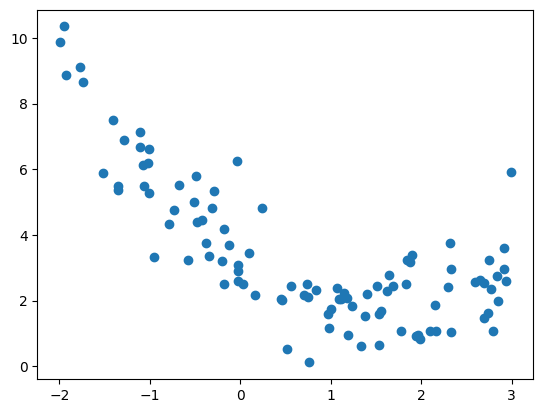

In [15]:
# let's create a dataset
m = 100
X1 = 5* np.random.rand(m,1) -2
X2 = 0.7*X1**2 -2*X1 +3 + np.random.randn(m,1)
plt.scatter(X1,X2)
plt.show

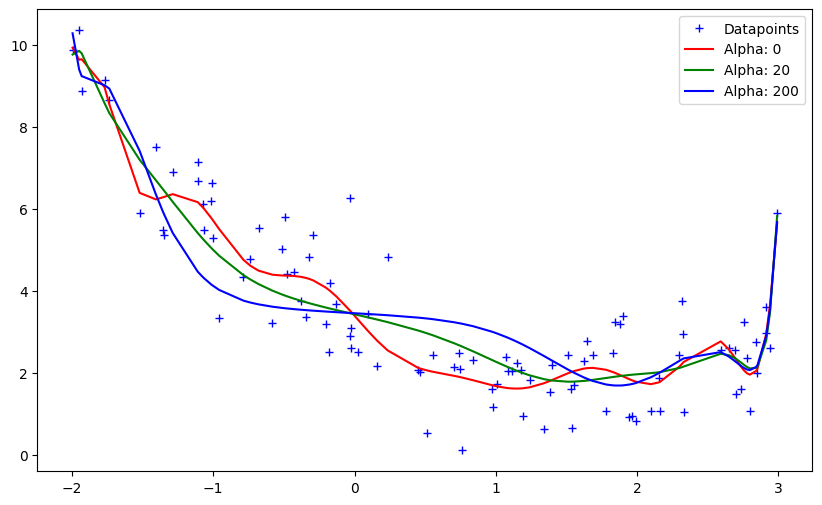

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(X1, X2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(X1, X2)
    return model.predict(X1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(X1, X2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(X1, X2, alpha)
    # Plot
    plt.plot(sorted(X1[:, 0]), preds[np.argsort(X1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()